In [5]:
# Using pip
!pip install Pillow


  Using cached pillow-10.3.0-cp39-cp39-win_amd64.whl.metadata (9.4 kB)
Using cached pillow-10.3.0-cp39-cp39-win_amd64.whl (2.5 MB)


In [22]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Load the dataset
file_path = 'DATASET_MS/karate_kata_depth_left_example.csv'   # Update this path to your CSV file location
df = pd.read_csv(file_path)

# Separate features and labels
labels = df['class']
features = df.drop(columns=['frame_name', 'class'])

# Function to extract coordinates
def extract_coordinates(coord_str):
    if isinstance(coord_str, str):
        coord_str = coord_str.strip('()')
        return list(map(float, coord_str.split(',')))
    return [0.0, 0.0, 0.0]  # Default value for missing or malformed data

# Apply the extraction function to all keypoints and expand the dataframe
features_expanded = features.apply(lambda x: x.map(extract_coordinates))


# Flatten the lists in the DataFrame
features_expanded = np.array(features_expanded.apply(lambda x: [item for sublist in x for item in sublist], axis=1).tolist())

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# One-hot encode the labels
labels_categorical = to_categorical(labels_encoded)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features_expanded, labels_categorical, test_size=0.2, random_state=42)

# Create a simple neural network model for demonstration
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(features_expanded.shape[1],)),
    tf.keras.layers.Dense(88, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(labels_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.save('final project')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")


INFO:tensorflow:Assets written to: final project\assets
Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 28.9538 - accuracy: 0.3429 - val_loss: 5.7401 - val_accuracy: 0.5085
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 3.9344 - accuracy: 0.5812 - val_loss: 2.1264 - val_accuracy: 0.6496
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 1.5403 - accuracy: 0.7179 - val_loss: 1.6123 - val_accuracy: 0.7863
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0882 - accuracy: 0.7863 - val_loss: 2.3430 - val_accuracy: 0.6282
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1830 - accuracy: 0.7821 - val_loss: 1.1195 - val_accuracy: 0.8034
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.8883 - accuracy: 0.8280 - val_loss: 0.8611 - val_accuracy: 0.8376
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.8686 - va

In [23]:
import PIL
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np

# Function to preprocess images
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Assuming input size is 224x224
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)  # Preprocess input according to ResNet50 requirements
    return img_array.flatten()[:99]  # Flatten and take first 99 elements

# Classify images and return class index and name
def classify_image(img_path):
    preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(np.expand_dims(preprocessed_img, axis=0))
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]  # Convert index to class name
    return predicted_class_index, predicted_class_name

# Example usage
test_image_path = 'DATASET_MS/extracted_frames_Left/zenkutsuDachi_awaseTsuki/frame_1244.png'  # Path to your test image
predicted_class_index, predicted_class_name = classify_image(test_image_path)
print("Predicted class index:", predicted_class_index)
print("Predicted class name:", predicted_class_name)


1/1 [==============================] - 0s 64ms/step
Predicted class index: 7
Predicted class name: zenkutsuDachi_chudanTsuki


In [41]:
import h5py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Load the dataset
file_path = 'DATASET_MS/karate_kata_depth_left_example.csv'  # Update this path to your CSV file location
df = pd.read_csv(file_path)

# Separate features and labels
labels = df['class']
features = df.drop(columns=['frame_name', 'class'])

# Extract coordinates
def extract_coordinates(coord_str):
    if isinstance(coord_str, str):
        coord_str = coord_str.strip('()')
        return list(map(float, coord_str.split(',')))
    return [0.0, 0.0, 0.0]  # Default value for missing or malformed data

# Apply the extraction function to all keypoints and expand the dataframe
features_expanded = features.apply(lambda x: x.map(extract_coordinates))

# Flatten the lists in the DataFrame
features_expanded = np.array(features_expanded.apply(lambda x: [item for sublist in x for item in sublist], axis=1).tolist())

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# One-hot encode the labels
labels_categorical = to_categorical(labels_encoded)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features_expanded, labels_categorical, test_size=0.2, random_state=42)

# Define a simple neural network model for demonstration
input_shape = (features_expanded.shape[1],)  # Number of 3D keypoints * 3 (x, y, z)
num_classes = labels_categorical.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Save the model
model.save('karate_pose_model.h5', save_format='h5')


# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")


Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 56.3735 - accuracy: 0.2714 - val_loss: 15.3600 - val_accuracy: 0.4060
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 8.3628 - accuracy: 0.5652 - val_loss: 6.4637 - val_accuracy: 0.6667
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 3.1597 - accuracy: 0.7233 - val_loss: 5.1214 - val_accuracy: 0.6795
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 2.9998 - accuracy: 0.7564 - val_loss: 3.4867 - val_accuracy: 0.6966
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 2.2873 - accuracy: 0.7788 - val_loss: 5.4613 - val_accuracy: 0.6368
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 4.0074 - accuracy: 0.7254 - val_loss: 5.2541 - val_accuracy: 0.6880
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 3.1789 - accuracy: 0.7703 - val_loss: 3.7439 - val_accuracy: 0.6838
Epoch 8/50
30/30 

In [27]:
!pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [32]:
!pip install mediapipe --user

1/1 [==============================] - 0s 61ms/step
Predicted class index: 2
Predicted class name: motoDachi_jodanTsuki


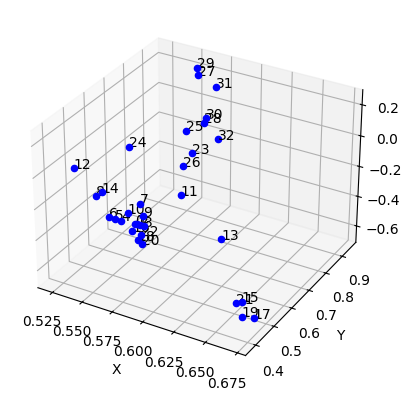

In [42]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the trained model
model = load_model('karate_pose_model.h5')

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True)

# Function to preprocess new data
def preprocess_new_data(keypoints):
    return np.array(keypoints).flatten()

# Function to classify a new pose
def classify_pose(keypoints):
    preprocessed_keypoints = preprocess_new_data(keypoints)
    prediction = model.predict(np.expand_dims(preprocessed_keypoints, axis=0))
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]
    return predicted_class_index, predicted_class_name

# Function to extract keypoints from an image
def extract_keypoints(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        keypoints = []
        for landmark in results.pose_landmarks.landmark:
            keypoints.append([landmark.x, landmark.y, landmark.z])
        return keypoints
    else:
        return None

# Example usage
image_path = 'DATASET_MS/extracted_frames_Left/zenkutsuDachi_awaseTsuki/frame_1244.png'
keypoints = extract_keypoints(image_path)
if keypoints:
    predicted_class_index, predicted_class_name = classify_pose(keypoints)
    print("Predicted class index:", predicted_class_index)
    print("Predicted class name:", predicted_class_name)

    # Visualize the 3D pose
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    keypoints = np.array(keypoints)

    for i in range(len(keypoints)):
        ax.scatter(keypoints[i][0], keypoints[i][1], keypoints[i][2], color='b')
        ax.text(keypoints[i][0], keypoints[i][1], keypoints[i][2], f'{i}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
else:
    print("No keypoints detected in the image.")


1/1 [==============================] - 0s 47ms/step
Predicted class index: 2
Predicted class name: motoDachi_jodanTsuki


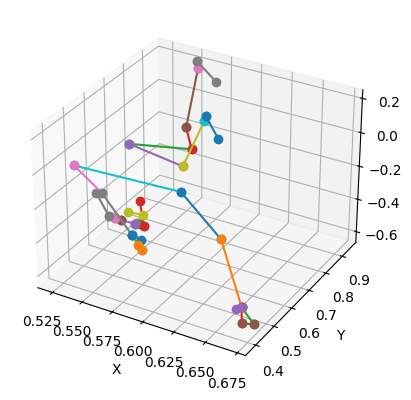

In [40]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the trained model
model = load_model('karate_pose_model.h5')

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True)

# Function to preprocess new data
def preprocess_new_data(keypoints):
    return np.array(keypoints).flatten()

# Function to classify a new pose
def classify_pose(keypoints):
    preprocessed_keypoints = preprocess_new_data(keypoints)
    prediction = model.predict(np.expand_dims(preprocessed_keypoints, axis=0))
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]
    return predicted_class_index, predicted_class_name

# Function to extract keypoints from an image
def extract_keypoints(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        keypoints = []
        for landmark in results.pose_landmarks.landmark:
            keypoints.append([landmark.x, landmark.y, landmark.z])
        return keypoints
    else:
        return None

# Define the connections between keypoints for the skeleton
connections = [
    (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8), (9, 10),
    (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (17, 19), 
    (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20), (23, 24), 
    (23, 25), (24, 26), (25, 27), (27, 29), (29, 31), (26, 28), (28, 30), (30, 32)
]

# Function to visualize the 3D skeleton
def visualize_3d_skeleton(keypoints):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    keypoints = np.array(keypoints)

    for connection in connections:
        start, end = connection
        xs = [keypoints[start][0], keypoints[end][0]]
        ys = [keypoints[start][1], keypoints[end][1]]
        zs = [keypoints[start][2], keypoints[end][2]]
        ax.plot(xs, ys, zs, marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Example usage
image_path = 'DATASET_MS/extracted_frames_Left/zenkutsuDachi_awaseTsuki/frame_1244.png'
keypoints = extract_keypoints(image_path)
if keypoints:
    predicted_class_index, predicted_class_name = classify_pose(keypoints)
    print("Predicted class index:", predicted_class_index)
    print("Predicted class name:", predicted_class_name)

    # Visualize the 3D pose
    visualize_3d_skeleton(keypoints)
else:
    print("No keypoints detected in the image.")
